In [1]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot
from sklearn.linear_model import LinearRegression 
import scipy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

importing Jupyter notebook from histplot.ipynb


In [2]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [3]:
Whole18 = histplot.getData(18, direct, ASC, 1, 365, np.arange(3, 7), float)
Whole19 = histplot.getData(19, direct, ASC, 1, 365, np.arange(3, 7), float)
Whole20 = histplot.getData(20, direct, ASC, 1, 366, np.arange(3, 7), float)

In [4]:
print(Whole18.shape)
Whole18 = Whole18[~np.isnan(Whole18).any(axis = 1), :]
print(Whole18.shape)

(525589, 4)
(525562, 4)


In [5]:
print(Whole19.shape)
Whole19 = Whole19[~np.isnan(Whole19).any(axis = 1), :]
print(Whole19.shape)

(525586, 4)
(525563, 4)


In [6]:
print(Whole20.shape)
Whole20 = Whole20[~np.isnan(Whole20).any(axis = 1), :]
print(Whole20.shape)

(527016, 4)
(526973, 4)


Text(0.5, 1.0, 'Decision Tree regression of Air Pressure and Precipitation')

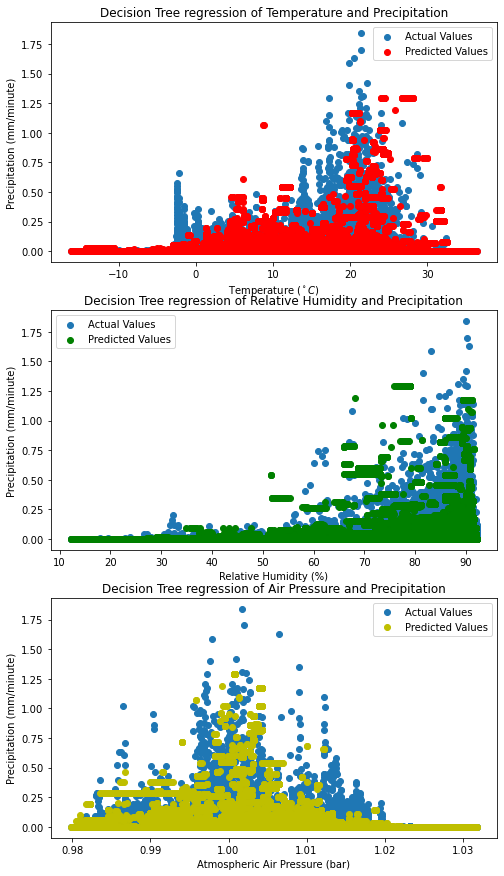

In [7]:
from sklearn.tree import DecisionTreeRegressor
newclf = DecisionTreeRegressor()
newclf = newclf.fit(Whole18[:, np.arange(0,3)], Whole18[:, 3])
newpredict2019 = newclf.predict(Whole19[:, np.arange(0,3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole19[:, 0], Whole19[:, 3])
plt.scatter(Whole19[:, 0], newpredict2019, color = 'r')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Temperature and Precipitation')
plt.subplot(3, 1, 2)
plt.scatter(Whole19[:, 1], Whole19[:, 3])
plt.scatter(Whole19[:,1], newpredict2019, color = 'g')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Relative Humidity and Precipitation')
plt.subplot(3, 1, 3)
plt.scatter(Whole19[:, 2], Whole19[:, 3])
plt.scatter(Whole19[:,2], newpredict2019, color = 'y')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Air Pressure and Precipitation')

In [9]:
#mae2018 = mean_absolute_error(Whole18[:, 3], newpredict2018)
#print(mae2018)
mae2019 = mean_absolute_error(Whole19[:, 3], newpredict2019)
print(mae2019)

0.007092496500125081


Coefficients: 
 [-3.25277547e-05  1.36990815e-04 -1.46662515e-01]
Mean squared error: 0.00053
Coefficient of determination: 0.01
Mean Absolute Error: 0.004


Text(0.5, 1.0, 'Linear Regression for Air Pressure and Precipitation')

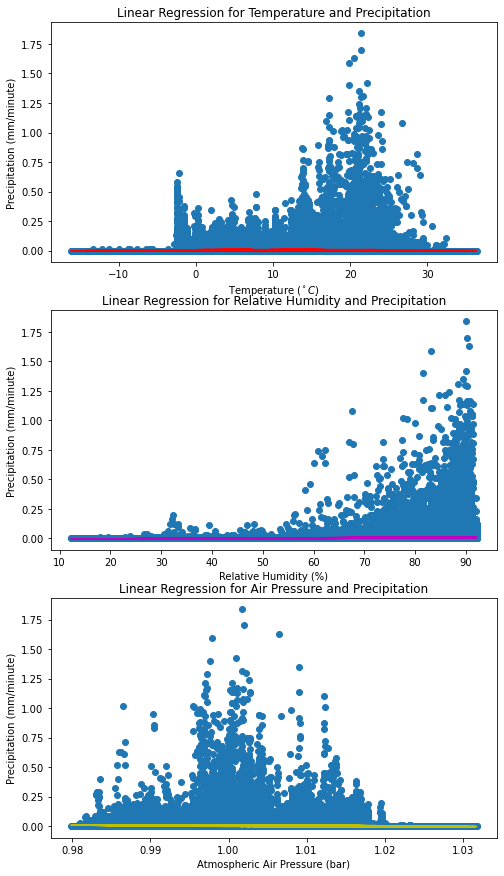

In [10]:
# This trains using a dataset, and uses that to predict the future! 
# Shows that its not particularly good. 
reg = LinearRegression()
reg.fit(Whole18[:, np.arange(0, 3)], Whole18[:, 3])
predict2019 = reg.predict(Whole19[:,np.arange(0, 3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole19[:, 0], Whole19[:, 3])
plt.plot(Whole19[:, 0], predict2019, color = 'r')
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Linear Regression for Temperature and Precipitation')
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.5f'
     % mean_squared_error(Whole19[:, 3], predict2019))
print('Coefficient of determination: %.2f'
      % r2_score(Whole19[:,3], predict2019))
print('Mean Absolute Error: %.3f' % mean_absolute_error(Whole19[:, 3], predict2019))
plt.subplot(3, 1, 2)
plt.scatter(Whole19[:, 1], Whole19[:, 3])
plt.plot(Whole19[:, 1], predict2019, color = 'm')
plt.ylabel('Precipitation (mm/minute)')
plt.xlabel('Relative Humidity (%)')
plt.title('Linear Regression for Relative Humidity and Precipitation')

plt.subplot(3,1,3)
plt.scatter(Whole19[:, 2], Whole19[:, 3])
plt.plot(Whole19[:, 2], predict2019, color = 'y')
plt.ylabel('Precipitation (mm/minute)')
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.title('Linear Regression for Air Pressure and Precipitation')

In [14]:
mae2019_lin = mean_absolute_error(Whole19[:, 3], predict2019)
print(mae2019_lin)

0.00443749917396508


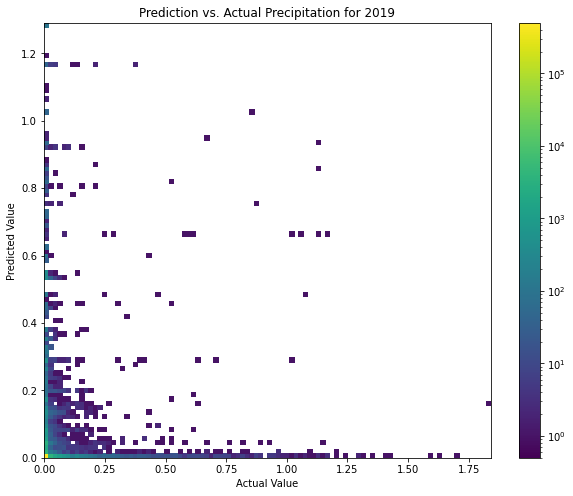

In [11]:
plt.figure(figsize = (10, 8))
plt.hist2d( Whole19[:, 3] ,newpredict2019, norm = mlt.colors.LogNorm(0.5), bins = (100, 100))
plt.title('Prediction vs. Actual Precipitation for 2019')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.colorbar()

In [16]:
DT_mod_len = len(newpredict2019[newpredict2019 > 0])
Lin_reg_mod_len = len(predict2019[predict2019> 0])
DT_accur = mod_acc1(newpredict2019, Whole19[:, 3], DT_mod_len)
print(DT_accur)
Lin_accur = mod_acc1(predict2019, Whole19[:,3], Lin_reg_mod_len)
print(Lin_accur)

11.92484781063626
4.687305766038028


Text(0.45, 0.175, 'DT Accuracy: 11.9 %')

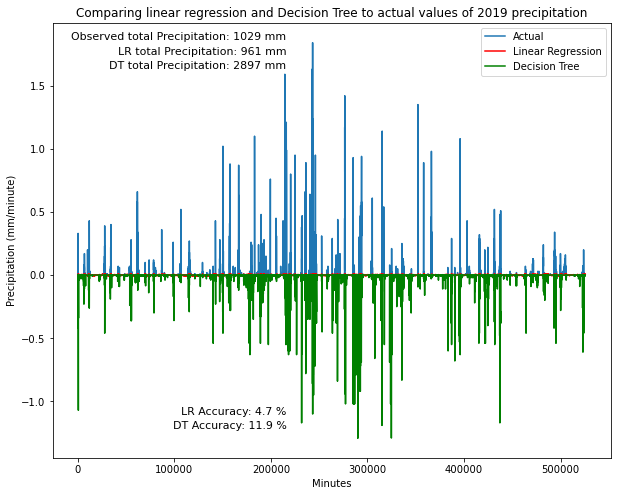

In [18]:
plt.figure(figsize= (10, 8))
plt.plot(Whole19[:, 3])
plt.plot(predict2019, color = 'r')
plt.plot(-newpredict2019, color = 'g')
plt.legend(['Actual', 'Linear Regression', 'Decision Tree'])
plt.xlabel('Minutes')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Comparing linear regression and Decision Tree to actual values of 2019 precipitation')
plt.figtext(0.45, 0.85, 'Observed total Precipitation: ' + str(round(np.nansum(Whole19[:, 3]))) + ' mm', fontsize = 11, ha = 'right')
plt.figtext(0.45, 0.825, 'LR total Precipitation: ' + str(round(np.nansum(predict2019))) + ' mm', fontsize = 11, ha = 'right')
plt.figtext(0.45, 0.8, 'DT total Precipitation: ' + str(round(np.nansum(newpredict2019))) + ' mm', fontsize = 11, ha = 'right')
plt.figtext(0.45, 0.2, 'LR Accuracy: ' + str(round(Lin_accur,1)) + 
           ' %', fontsize = 11, ha ='right')
plt.figtext(0.45, 0.175, 'DT Accuracy: ' + str(round(DT_accur,1)) + 
           ' %', fontsize = 11, ha ='right')

In [13]:
print(np.sum(Whole19[:, 3]))
print(np.sum(predict2019))
print(np.sum(newpredict2019))

1028.5700000000002
960.7632659783857
2897.4654047619047


In [26]:
# MAE calculation 
LR_mae = mean_absolute_error(Precip19, predict2019)
DT_mae = mean_absolute_error(Precip19, newpredict2019)
print(LR_mae)
print(DT_mae)

0.00443749917396508
0.007092496500125081


In [27]:
observed = len(Precip19[Precip19 > 0])
LR_min = len(predict2019[predict2019 > 0])
DT_min = len(newpredict2019[newpredict2019 > 0])
print(observed)
print(LR_min)
print(DT_min)

17117
361999
32361


In [24]:
Precip19 = Whole19[:,3]
len19 = len(Precip19[Precip19 >= 0.1])
LR_len19 = len(predict2019[predict2019 >= 0.1])
DT_len19 = len(newpredict2019[newpredict2019 >= 0.1])
LR_max = np.max(predict2019)

In [25]:
print(LR_len19)
print(DT_len19)
print(len19)
print(LR_max)

0
6685
2496
0.010174072197600664


In [15]:
# Starts with a simple model accuracy, precip with precip. 
def mod_acc1(model, observed, pre_min):
    mod_accuracy = 0
    for i in range(len(observed)):
        mod = model[i]
        obs = observed[i]
        #if (mod == 0 and obs == 0):
            #mod_accuracy += 1
        if (mod > 0 and obs > 0):
            mod_accuracy += 1
        else: 
            mod_accuracy += 0
    mod_accuracy = 100*mod_accuracy/pre_min
    return mod_accuracy

In [19]:
def hourly(weather):
    minute = 0
    Hourly = np.zeros((8760, 4))
    hour = 0
    endminute = 60
    while (minute < len(weather[:, 3]) and hour < 8760):
        temp = np.nanmean(weather[np.arange(minute, endminute), 0])
        relhum = np.nanmean(weather[np.arange(minute, endminute), 1])
        air_p = np.nanmean(weather[np.arange(minute, endminute), 2])
        precip = np.nansum(weather[np.arange(minute, endminute), 3])
        if (minute+60 < len(weather[:, 3])):
            minute += 60
        if (minute+60 < len(weather[:, 3])):
            endminute = minute + 60
        else:
            endminute = len(weather[:, 3])
        Hourly[hour, 0] = temp
        Hourly[hour, 1] = relhum
        Hourly[hour, 2] = air_p
        Hourly[hour, 3] = precip
        hour += 1
    
    return Hourly